In [4]:
from scipy import ndimage
import cv2
import numpy as np
import matplotlib.pyplot as plt

pic_path0 = "E:\\rrr.png"
pic_path1 = "E:\\tensorflow_facnet\\test_picture\\111.png"
pic_path2 = "E:\\tensorflow_facnet\\test_picture\\222.png"
pic_path3 = "E:\\tensorflow_facnet\\test_picture\\333.png"
pic_path4 = "E:\\tensorflow_facnet\\test_picture\\444.png"
pic_path5 = "E:\\tensorflow_facnet\\test_picture\\555.png"

greyscale = cv2.imread(pic_path5 ,cv2.IMREAD_GRAYSCALE)
greyscale = greyscale.astype("int32")
edge_horizont = ndimage.sobel(greyscale,axis=0, mode='constant')
edge_vertical = ndimage.sobel(greyscale,axis=1, mode='constant')
magnitude = np.hypot(edge_horizont, edge_vertical)
magnitude *= 255.0 / np.max(magnitude)
magnitude = (magnitude > 50)

plt.imshow(magnitude,cmap='gray')
plt.axis("off")
plt.show()

magnitude.cumsum().max()

<Figure size 640x480 with 1 Axes>

1411

In [2]:
from scipy import ndimage
import cv2

cv2.imread?

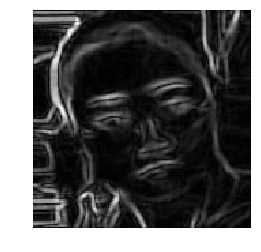

741777

In [5]:
import cv2

pic_path0 = "E:\\rrr.png"
pic_path1 = "E:\\tensorflow_facnet\\test_picture\\111.png"
pic_path2 = "E:\\tensorflow_facnet\\test_picture\\222.png"
pic_path3 = "E:\\tensorflow_facnet\\test_picture\\333.png"
pic_path4 = "E:\\tensorflow_facnet\\test_picture\\444.png"
pic_path5 = "E:\\tensorflow_facnet\\test_picture\\555.png"
pic_path6 = "E:\\tensorflow_facnet\\test_picture\\666.png"
pic_path7 = "E:\\tensorflow_facnet\\test_picture\\777.png"
pic_path8 = "E:\\tensorflow_facnet\\test_picture\\888.png"

def getGradientMagnitude(im):
    "Get magnitude of gradient for given image"
    ddepth = cv2.CV_32F
    dx = cv2.Sobel(im, ddepth, 1, 0)
    dy = cv2.Sobel(im, ddepth, 0, 1)
    dxabs = cv2.convertScaleAbs(dx)
    dyabs = cv2.convertScaleAbs(dy)
    mag = cv2.addWeighted(dxabs, 0.5, dyabs, 0.5, 0)
    return mag

greyscale = cv2.imread(pic_path8 ,cv2.IMREAD_GRAYSCALE)
magnitude = getGradientMagnitude(greyscale)

magnitude = (magnitude )
plt.imshow(magnitude,cmap='gray')
plt.axis("off")
plt.show()


magnitude.cumsum().max()

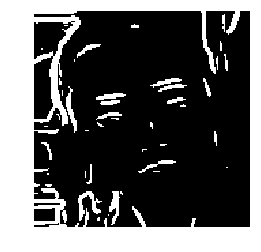

2.650819145518792

In [72]:
from scipy import ndimage
import cv2
import numpy as np
import matplotlib.pyplot as plt

pic_path0 = "E:\\rrr.png"
pic_path1 = "E:\\tensorflow_facnet\\test_picture\\111.png"
pic_path2 = "E:\\tensorflow_facnet\\test_picture\\222.png"
pic_path3 = "E:\\tensorflow_facnet\\test_picture\\333.png"
pic_path4 = "E:\\tensorflow_facnet\\test_picture\\444.png"
pic_path5 = "E:\\tensorflow_facnet\\test_picture\\555.png"
pic_path6 = "E:\\tensorflow_facnet\\test_picture\\666.png"
pic_path7 = "E:\\tensorflow_facnet\\test_picture\\777.png"
pic_path8 = "E:\\tensorflow_facnet\\test_picture\\888.png"

def getGradientMagnitude(im):
    "Get magnitude of gradient for given image"
    ddepth = cv2.CV_32F
    dx = cv2.Sobel(im, ddepth, 1, 0)
    dy = cv2.Sobel(im, ddepth, 0, 1)
    dxabs = cv2.convertScaleAbs(dx)
    dyabs = cv2.convertScaleAbs(dy)
    mag = cv2.addWeighted(dxabs, 0.5, dyabs, 0.5, 0)
    return mag

greyscale1 = cv2.imread(pic_path8 ,cv2.IMREAD_GRAYSCALE)
greyscale = greyscale1.astype("int32")
edge_horizont = ndimage.sobel(greyscale,axis=0, mode='constant')
edge_vertical = ndimage.sobel(greyscale,axis=1, mode='constant')
magnitude = np.hypot(edge_horizont, edge_vertical)
magnitude *= 255.0 / np.max(magnitude)
magnitude = (magnitude > 30)

magnitude1 = getGradientMagnitude(greyscale1)
magnitude1 = (magnitude1 > 30)

plt.imshow(magnitude,cmap='gray')
plt.axis("off")
plt.show()

magnitude1.cumsum().max() / magnitude.cumsum().max()

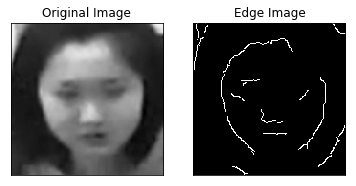

653


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("E:\\tensorflow_facnet\\test_picture\\333.png",0)
edges = cv2.Canny(img,50,80)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

print((edges>150).sum())



# 最终这个方案以失败告终，下面两个是google到的一些没用的东西

In [2]:
import cv2
import numpy as np

## (1) Read
img = cv2.imread("E:\\tensorflow_facnet\\test_picture\\333.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 20, 100, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) Find the min-area contour
_, cnts, _ = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea)
for cnt in cnts:
    if cv2.contourArea(cnt) > 20:
        break

## (4) Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)

## Save it
cv2.imshow("dst.png", dst)
cv2.waitKey()

32

In [4]:
import cv2

bgs = cv2.BackgroundSubtractorMOG2()
capture = cv2.VideoCapture(0)
cv2.namedWindow("Original",1)
cv2.namedWindow("Foreground",1)   #虽然没啥用这段代码，但是我学习了一个namedWindow()可以用来等待命令，哈哈哈
while True:
            img = capture.read()[1]
            cv2.imshow("Original",img)
            #fgmask = bgs.apply(img)
            fgmask=cv2.BackgroundSubtractorMOG2(img)
            foreground = cv2.bitwise_and(img,img,mask=fgmask)
            cv2.imshow("Foreground",foreground)
            if cv2.waitKey >= 27:
                cv2.destroyAllWindows()
                capture.release()

error: C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:331: error: (-215) size.width>0 && size.height>0 in function cv::imshow
